In [2]:
# Set which gpu to use
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = '1'

# from vrae.vrae import VRAE
# from vrae.utils import *
from vrae.utils_VAE import *
import numpy as np
# import torch
import pickle

from hmmlearn import hmm
# from sklearn.decomposition import PCA, TruncatedSVD
# from sklearn.manifold import TSNE

# import plotly
# from torch.utils.data import DataLoader, TensorDataset
# plotly.offline.init_notebook_mode()

%load_ext autoreload
%autoreload 2

In [18]:
training_file = ['20201020_Pop_Cage_001','20201020_Pop_Cage_002','20201020_Pop_Cage_003', '20201020_Pop_Cage_004',
                '20201020_Pop_Cage_005', '20201020_Pop_Cage_006', '20201020_Pop_Cage_007']
# training_file = ['20201020_Pop_Cage_001']

X_all = []
length_all = []
for ii in training_file:
    X, y = load_data(direc = 'data', dataset="EMG", all_file = [ii], trim = False)
#     print(X.shape)
    X = X[::2]
    y = y[::2]
    X = X.reshape(-1, 15)
#     print(X.shape)
    X_all.append(X)
    length_all.append(X.shape[0])
X_all = np.concatenate(X_all, axis = 0)
print(X_all.shape, length_all)

Loading 20201020_Pop_Cage_001, X shape (3599, 150, 1), y shape (3599, 1), has label [-1.  0.  1.  2.  3.]
Dataset shape: (3599, 10, 15)
Label: [-1.  0.  1.  2.  3.], shape: (3599, 1)
Loading 20201020_Pop_Cage_002, X shape (3599, 150, 1), y shape (3599, 1), has label [-1.  0.  1.  2.  3.]
Dataset shape: (3599, 10, 15)
Label: [-1.  0.  1.  2.  3.], shape: (3599, 1)
Loading 20201020_Pop_Cage_003, X shape (3599, 150, 1), y shape (3599, 1), has label [-1.  0.  1.  2.  3.  4.]
Dataset shape: (3599, 10, 15)
Label: [-1.  0.  1.  2.  3.  4.], shape: (3599, 1)
Loading 20201020_Pop_Cage_004, X shape (3601, 150, 1), y shape (3601, 1), has label [-1.  0.  1.  2.  3.  4.]
Dataset shape: (3601, 10, 15)
Label: [-1.  0.  1.  2.  3.  4.], shape: (3601, 1)
Loading 20201020_Pop_Cage_005, X shape (3599, 150, 1), y shape (3599, 1), has label [-1.  0.  1.  2.  3.  5.]
Dataset shape: (3599, 10, 15)
Label: [-1.  0.  1.  2.  3.  5.], shape: (3599, 1)
Loading 20201020_Pop_Cage_006, X shape (3599, 150, 1), y shap

In [29]:
for ii in range(5,6):
    HMM = hmm.GaussianHMM(n_components=ii, covariance_type="full", n_iter=1000)
    HMM.fit(X_all, length_all)
    print(HMM.monitor_.converged)
    logprob = HMM.score(X_all, length_all)
    print(ii, logprob, np.exp(logprob))

True
5 -6659618.165074982 0.0


In [34]:
HMM = hmm.GaussianHMM(n_components=10, covariance_type="full", n_iter=1000)
HMM.fit(X_all, length_all)
print(HMM.monitor_.converged)
logprob, state_sequence = HMM.decode(X_all, length_all)
print(ii, logprob, np.exp(logprob))

True
14 -6402612.458910796 0.0


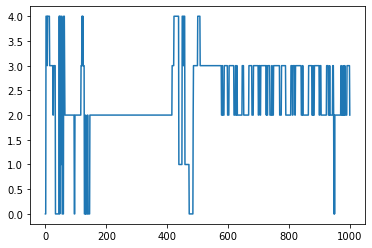

In [32]:
plt.plot(state_sequence[0:1000]) # 5

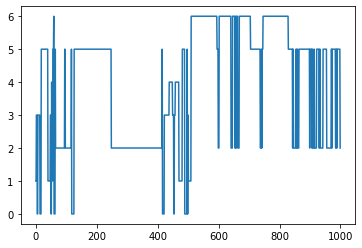

In [30]:
plt.plot(state_sequence[0:1000]) # 7

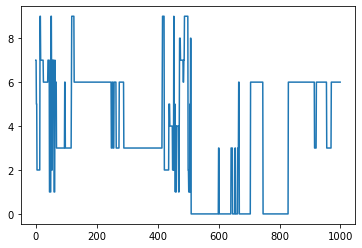

In [35]:
plt.plot(state_sequence[0:1000]) # 10

In [9]:
for ii in range(10, 100, 5):
    HMM = hmm.GaussianHMM(n_components=ii, covariance_type="full", n_iter=1000)
    HMM.fit(X_all)
    logprob = HMM.score(X_all)
    print(ii, logprob, np.exp(logprob))

KeyboardInterrupt: 

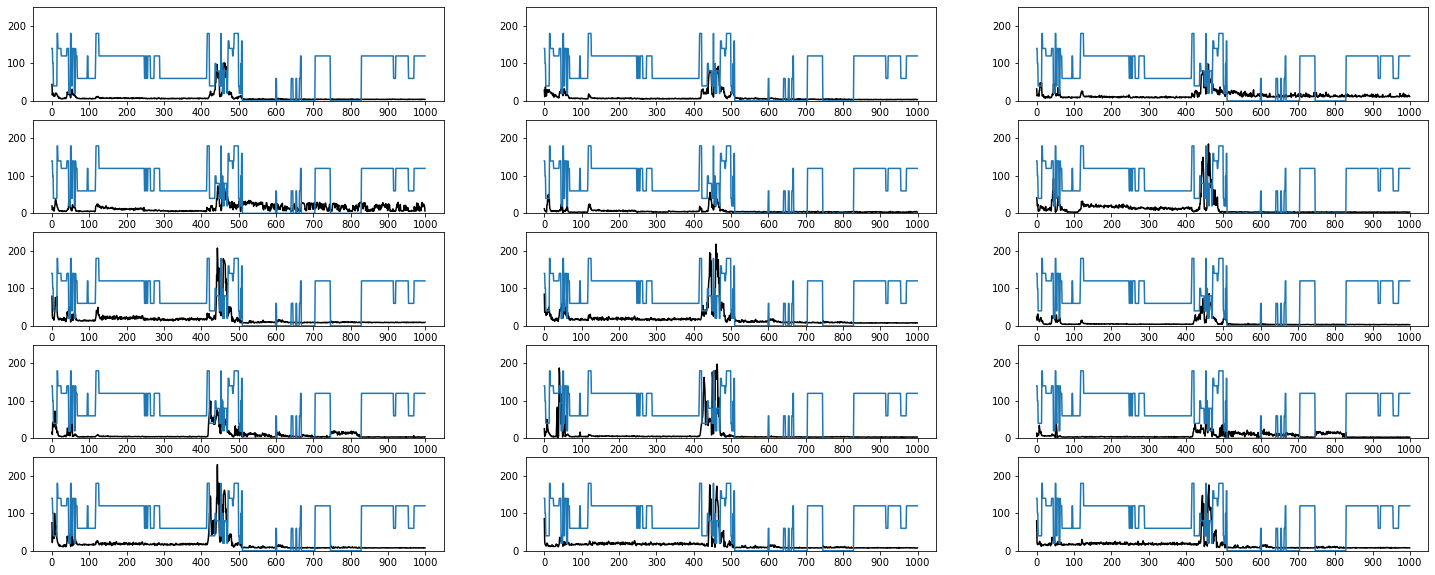

In [37]:
fig, axs = plt.subplots(5, 3, figsize=(25,10))
X = X_all.reshape(-1, 15)[0:1000, :]
# reconstruction = reconstruction.reshape(-1, 15)[xlim[0]:xlim[1], :]

for ii in range(15):
    loc = [ii//3, ii%3]
    axs[loc[0], loc[1]].plot(X[:, ii], color = 'k', label = 'Ori')
    axs[loc[0], loc[1]].plot(state_sequence[0:1000]*20)
#     axs[loc[0], loc[1]].plot(reconstruction[:, ii], color = 'r', label = 'Rec')
    axs[loc[0], loc[1]].set_xticks(np.arange(0, len(X[:, ii])+1, 100))
#     axs[loc[0], loc[1]].set_xticklabels(np.arange(xlim[0], xlim[1]+1, 100))
    axs[loc[0], loc[1]].set_ylim([0, 250])
#     axs[loc[0], loc[1]].annotate(label[ii], xy=(50, 80), xycoords='axes points',
#         size=14, ha='right', va='top')

8


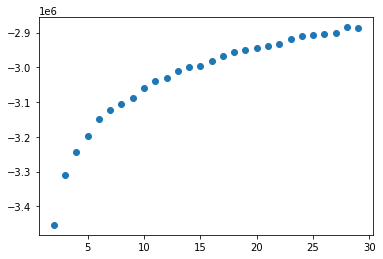

In [22]:
aaaa = [-3453118.4671567394, -3310721.9335245537, -3243441.7529329807, -3196518.7136830776,
        -3149312.569666436, -3122091.526743252, -3105209.6287337514, -3086842.7645189646, -3058484.2894628937,
        -3039414.4483253546, -3031977.9955091425, -3010953.5688294433, -3000104.678085714, -2995231.6925335443,
        -2981513.110186295, -2968427.425841727, -2955289.672913381, -2949563.0683658416, -2944672.841234664, 
        -2937784.830834264, -2932866.277839033, -2919678.611472601, -2910207.0981108444, -2905699.5556348944, 
       -2903186.581331673, -2900047.9907814125, -2884835.51215846, -2885843.3315333636]
plt.scatter(list(range(2, 30)), aaaa)

from kneed import KneeLocator

kneedle = KneeLocator(list(range(2, 30)), aaaa, S=5.0, curve='concave', direction='increasing', interp_method='polynomial')
print(kneedle.knee)
# aaa = np.where(cumul_merges == kneedle.knee)[0][0]

# plt.scatter(cumul_merges, entropies)
# plt.axvline(cumul_merges[aaa])
# print(aaa)